In [1]:
# Load dependencies

import numpy as np
import PIL
import matplotlib.pyplot as plt
import os
from scipy.ndimage import gaussian_filter

In [2]:
# Assign directory

directory = "chest_xray/train/PNEUMONIA/" # Get the directory path of the folder containing the images
files = os.listdir(directory) # Get the list of all files in the directory

# Load x-ray imaging data

images = []
for i in files:
    if not i.startswith('.'):
        image = np.array(PIL.Image.open(directory + i).convert('L'))
        images.append(image)

In [3]:
len(files)

3875

In [9]:
x = 3875/64
print(x)

60.546875


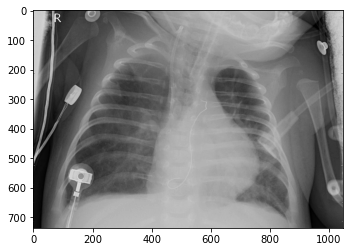

In [4]:
plt.imshow(images[0], cmap='gray')

In [5]:
# Function for histogram equalization

def histogram_equalization(image):
    # Flatten image array into 1D and generate histogram
    hist, bins = np.histogram(image.flatten(), 256, [0,256])
    # Compute the cumulative distribution function (CDF)
    cdf = hist.cumsum()
    # 1. Set all zeros in the CDF to the minimum nonzero value since there be zero values
    cdf_m = np.ma.masked_equal(cdf, 0)
    # 2. Normalize the CDF
    cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
    cdf = np.ma.filled(cdf_m,0).astype('uint8')
    image_equalized = cdf[image]
    return image_equalized

# Function for Gaussian blur

from scipy.ndimage import gaussian_filter
def apply_gaussian_blur(img_array, sigma=1.0):
    blurred_array = gaussian_filter(img_array, sigma=sigma)
    return blurred_array

In [6]:
# Perform histogram equalization across all images to enhance global contrast

equalized_images = []
for image in images:
    equalized_images.append(histogram_equalization(image))

In [7]:
# choose to use Gaussian blur after histrogram equalization --> to smooth any harsh transitions 
# perform gaussian blurring across all images

gaussian_images = []
for image in equalized_images:
    gaussian_images.append(apply_gaussian_blur(image))

In [8]:
#function for resizing and centercropping
from scipy import ndimage

def resize_and_center_crop_image(image, new_shape):

    # Resizing
    old_shape = image.shape
    row_scale = new_shape[0] / old_shape[0]
    col_scale = new_shape[1] / old_shape[1]
    resized_image = ndimage.zoom(image, (row_scale, col_scale))

    # Center cropping
    height, width = resized_image.shape
    startx = width//2 - (new_shape[1]//2)
    starty = height//2 - (new_shape[0]//2)
    cropped_image = resized_image[starty:starty+new_shape[0], startx:startx+new_shape[1]]

    return cropped_image

# assuming `images` is your list of 2D numpy arrays
resized_cropped_images = [resize_and_center_crop_image(image, new_shape=(128, 128)) for image in images]

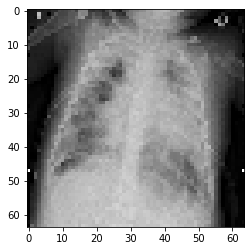

In [14]:
plt.imshow(resized_cropped_images[10], cmap='gray')

In [9]:
resized_cropped_images[0].shape

(128, 128)

In [10]:
# Save each transformed image into a new directory

# create the directory if it doesn't exist
save_dir = 'preprocessedPNEUMONIAtrain128x128'
os.makedirs(save_dir, exist_ok=True)

def save_image(image_array, filename, directory):
    # Convert numpy array to PIL image
    image = PIL.Image.fromarray(image_array)

    # Save the image
    image.save(os.path.join(directory, filename))

# assuming `images` is your list of 2D numpy arrays
for i, image in enumerate(resized_cropped_images):
    save_image(image, f'image_{i}.png', save_dir)